## project objective: Design a ML system that provides bank transaction data

In [1]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support, matthews_corrcoef
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
data = pd.read_csv('C:\\Users\\user\\Desktop\\internship\\task 1\\banktransaction.csv')
data

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1
...,...,...,...,...,...,...,...
2335,transfer,14945,43793,106907,2019-03-29 14:53:00,0,none
2336,transfer,9532,43793,106907,2019-04-13 13:19:00,0,none
2337,transfer,27332,43793,106907,2019-05-10 09:34:00,0,none
2338,transfer,32685,43793,106907,2019-07-08 12:20:00,0,none


In [3]:
data.dropna(inplace=True)  # Remove rows with missing values
cols_to_drop = ['date', 'typeoffraud']
data.drop(columns=cols_to_drop, inplace=True)
data

,typeofaction,sourceid,destinationid,amountofmoney,isfraud
0,cash-in,30105,28942,494528,1
1,cash-in,30105,8692,494528,1
2,cash-in,30105,60094,494528,1
3,cash-in,30105,20575,494528,1
4,cash-in,30105,45938,494528,1
...,...,...,...,...,...
2335,transfer,14945,43793,106907,0
2336,transfer,9532,43793,106907,0
2337,transfer,27332,43793,106907,0
2338,transfer,32685,43793,106907,0


In [4]:
#understanding the data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   typeofaction   2340 non-null   object
 1   sourceid       2340 non-null   int64 
 2   destinationid  2340 non-null   int64 
 3   amountofmoney  2340 non-null   int64 
 4   isfraud        2340 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 91.5+ KB


,sourceid,destinationid,amountofmoney,isfraud
count,2340.000000,2340.000000,2.340000e+03,2340.000000
mean,49111.255128,52257.918803,2.508583e+06,0.597863
std,29614.440603,28988.847246,2.560434e+06,0.490434
min,61.000000,53.000000,1.333200e+04,0.000000
25%,24033.000000,28046.000000,3.359140e+05,0.000000
50%,46632.500000,52748.500000,1.162354e+06,1.000000
75%,75107.000000,78030.000000,4.686559e+06,1.000000
max,100000.000000,99950.000000,7.952497e+06,1.000000


In [5]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Define the categories to be encoded
categories = ["cashin", "transfer"]

# Fit the encoder to the categories and transform them to numerical values
encoded_categories = le.fit_transform(categories)

# Print the encoded categories
print(encoded_categories)

[0 1]


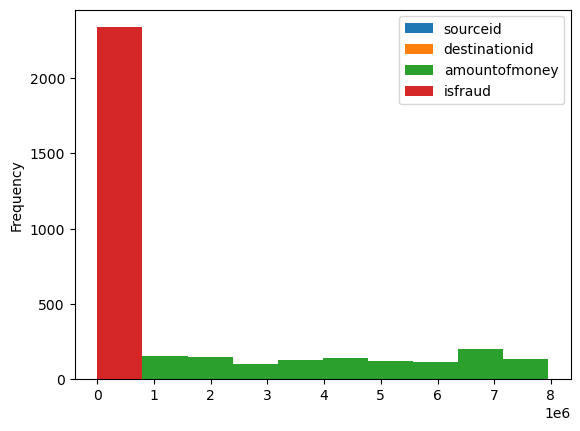

In [6]:
data.plot(kind='hist')
plt.show()

In [7]:
#Data Preparation
#data separation as X and y
X = data.drop(data.columns[-2], axis=1)
y = data['isfraud']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[["typeofaction"]])  # Replace 'categorical_feature' with your feature name
X_test_encoded = encoder.transform(X_test[["typeofaction"]])  # Replace 'categorical_feature' with your feature name

In [11]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
encoder = LabelEncoder()

# Encode 'typeofaction' for the training data
X_train['typeofaction'] = encoder.fit_transform(X_train['typeofaction'])

# Encode 'typeofaction' for the testing data using the same encoder
X_test['typeofaction'] = encoder.transform(X_test['typeofaction'])

In [12]:
# Define a list of classifiers
classifiers = [
    KNeighborsClassifier(n_neighbors=10),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(n_estimators=1000, max_depth=5),
    LogisticRegression(max_iter=100000),
    GaussianNB(),
    MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000, activation='relu')
]

clf_names = [
    "Nearest Neighbors (k=10)",
    "Decision Tree (Max Depth=10)",
    "Random Forest (Max Depth=5)",
    "Logistic Regression",
    "Gaussian Naive Bayes",
    "MLP (ReLU)"
]

scores_micro = {}
scores_macro = {}
scores_mcc = {}

# Define a function for classifier evaluation
def evaluate_classifier(name, clf, X_train, y_train, X_test, y_test):
    print("Fitting classifier", name)
    clf.fit(X_train, y_train)
    print("Predicting labels for classifier", name)
    y_pred = clf.predict(X_test)
    
    scores_micro[name] = precision_recall_fscore_support(y_test, y_pred, average="micro")
    scores_macro[name] = precision_recall_fscore_support(y_test, y_pred, average="macro")
    scores_mcc[name] = matthews_corrcoef(y_test, y_pred)

# Loop through classifiers and evaluate them
for name, clf in zip(clf_names, classifiers):
    evaluate_classifier(name, clf, X_train, y_train, X_test, y_test)

# Print the evaluation results or use them as needed
print("Micro-Averaged Scores:")
print(scores_micro)

print("Macro-Averaged Scores:")
print(scores_macro)

print("MCC Scores:")
print(scores_mcc)

Fitting classifier Nearest Neighbors (k=10)
Predicting labels for classifier Nearest Neighbors (k=10)
Fitting classifier Decision Tree (Max Depth=10)
Predicting labels for classifier Decision Tree (Max Depth=10)
Fitting classifier Random Forest (Max Depth=5)
Predicting labels for classifier Random Forest (Max Depth=5)
Fitting classifier Logistic Regression
Predicting labels for classifier Logistic Regression
Fitting classifier Gaussian Naive Bayes
Predicting labels for classifier Gaussian Naive Bayes
Fitting classifier MLP (ReLU)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicting labels for classifier MLP (ReLU)
Micro-Averaged Scores:
{'Nearest Neighbors (k=10)': (0.561965811965812, 0.561965811965812, 0.561965811965812, None), 'Decision Tree (Max Depth=10)': (1.0, 1.0, 1.0, None), 'Random Forest (Max Depth=5)': (1.0, 1.0, 1.0, None), 'Logistic Regression': (0.6004273504273504, 0.6004273504273504, 0.6004273504273504, None), 'Gaussian Naive Bayes': (0.8995726495726496, 0.8995726495726496, 0.8995726495726496, None), 'MLP (ReLU)': (0.5491452991452992, 0.5491452991452992, 0.5491452991452992, None)}
Macro-Averaged Scores:
{'Nearest Neighbors (k=10)': (0.5305213191205862, 0.5278988334253145, 0.5259483256992928, None), 'Decision Tree (Max Depth=10)': (1.0, 1.0, 1.0, None), 'Random Forest (Max Depth=5)': (1.0, 1.0, 1.0, None), 'Logistic Regression': (0.3002136752136752, 0.5, 0.3751668891855807, None), 'Gaussian Naive Bayes': (0.9283536585365854, 0.874331550802139, 0.889546707642247, None), 'MLP (ReLU)': (0.47962962962962963, 0.4868118065731631, 0.459042526966

In [13]:
#Create and train the random forest model:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
#Make predictions and evaluate the model:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[187   0]
 [  0 281]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       281

    accuracy                           1.00       468
   macro avg       1.00      1.00      1.00       468
weighted avg       1.00      1.00      1.00       468



1.00 accuracy in the classification report indicates that the model has predicted all the test data correctly. the precision, recall, and F1-score for both classes are 1.00, which means the model has performed perfectly in terms of these metrics. This is a strong indication that the model has a high level of accuracy and can be trusted to make reliable predictions

In [15]:
# Assuming y_test is your actual test data and y_pred is your predicted test data
cm = confusion_matrix(y_test, y_pred)

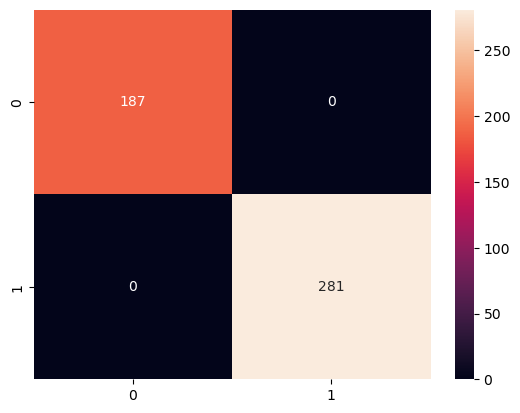

In [16]:
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')

# Display the plot
plt.show()

In [17]:
import joblib

# Save the model to a file
joblib.dump(model, 'internship.pkl')


['internship.pkl']

## Integrate the trained model in any web application

In [23]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the saved model from the file
model = joblib.load('internship.pkl')

In [24]:
#create a route to handle predictions
@app.route('/predict', methods=['POST'])
def predict():
    # Get the input data from the request
    data = request.get_json(force=True)

    # Make predictions using the model and the input data
    predictions = model.predict(data)

    # Return the predictions as a JSON response
    return jsonify({'predictions': predictions.tolist()})

In [25]:
import os
os.environ['FLASK_ENV'] = 'development'

In [26]:
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: development
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1